# Loading Data

In [131]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
%matplotlib inline

In [132]:
DATA_SRC='./Data/Dataset.csv'
df = pd.read_csv(DATA_SRC)

df.sort_values('MatchID', inplace = True)
df.head()

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,...,Corners_home,Corners_away,Offsides_home,Offsides_away,Yellow_cards_home,Yellow_cards_away,Fouls_conceded_home,Fouls_conceded_away,Red_cards_home,Red_cards_away
0,5567,Arsenal,Aston Villa,1,1,72.9,27.1,7.0,3.0,24.0,...,18.0,1.0,2.0,6.0,1.0,2.0,10.0,19.0,0.0,0.0
1,5568,Bolton,Spurs,2,0,37.8,62.2,4.0,2.0,13.0,...,6.0,3.0,3.0,1.0,0.0,0.0,22.0,22.0,0.0,0.0
2,5569,Everton,Watford,2,1,47.0,53.0,2.0,7.0,8.0,...,0.0,6.0,5.0,1.0,2.0,2.0,12.0,15.0,0.0,0.0
3,5570,Newcastle,Wigan,2,1,55.3,44.7,5.0,4.0,8.0,...,4.0,11.0,6.0,3.0,1.0,2.0,18.0,19.0,0.0,0.0
4,5571,Portsmouth,Blackburn,3,0,44.3,55.7,11.0,3.0,21.0,...,6.0,2.0,5.0,0.0,2.0,0.0,22.0,17.0,0.0,1.0


데이터셋을 불러서 ```MatchID```, ```Home_team```, ```Away_team``` 등의 column을 drop한 DataFrame을 ```df_```에 저장  
필요시 함수를 만들어서 feature를 가공해 덧붙일 수 있음(ex. 유효 슈팅 / 슈팅)

In [133]:
df_ = df.drop(columns = ['MatchID', 'Home_team', 'Away_team', 'Score_home', 'Score_away'])
print(len(df_.columns))
list(df_)
#df_.hist()

24


['Possession_home',
 'Possession_away',
 'Shots_on_target_home',
 'Shots_on_target_away',
 'Shots_home',
 'Shots_away',
 'Touches_home',
 'Touches_away',
 'Passes_home',
 'Passes_away',
 'Tackles_home',
 'Tackles_away',
 'Clearances_home',
 'Clearances_away',
 'Corners_home',
 'Corners_away',
 'Offsides_home',
 'Offsides_away',
 'Yellow_cards_home',
 'Yellow_cards_away',
 'Fouls_conceded_home',
 'Fouls_conceded_away',
 'Red_cards_home',
 'Red_cards_away']

Correlation matrix를 보기 위해 seaborn을 import하고, home team과 away team의 features 간 correlation 출력  
사실 home team과 away team의 승률에 약간 차이가 나서 home/away에 따른 차이가 있을 줄 알고 그래프를 만들어 보았는데  
딱히 두드러지는 차이점은 없었음

['Possession_home',
 'Shots_on_target_home',
 'Shots_home',
 'Touches_home',
 'Passes_home',
 'Tackles_home',
 'Clearances_home',
 'Corners_home',
 'Offsides_home',
 'Yellow_cards_home',
 'Fouls_conceded_home',
 'Red_cards_home']

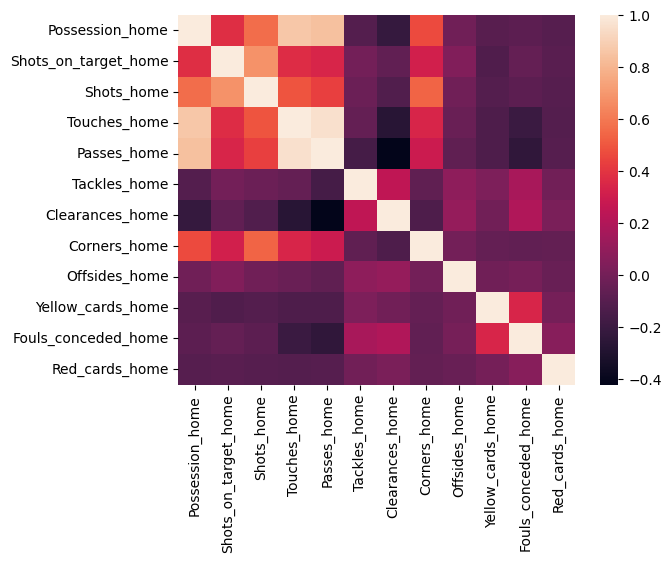

In [134]:
import seaborn as sbn

home_features = [f for f in list(df_) if 'home' in f]
df_home = df_[home_features]  #home team features를 담은 DataFrame 임시 생성
home_corr_matrix = df_home.corr()

sbn.heatmap(home_corr_matrix)
list(df_home)

<AxesSubplot:>

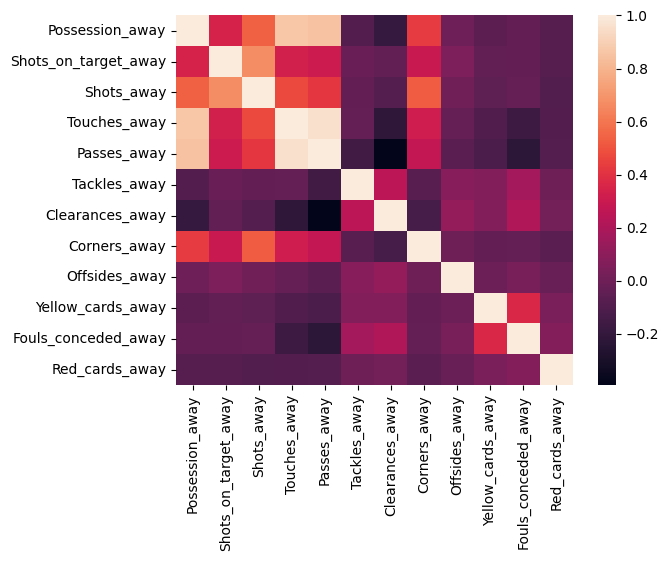

In [135]:
away_features = [f for f in list(df_) if 'away' in f]
away_corr_matrix = df_[away_features].corr()
df_away = df_[away_features] #임시 생성

sbn.heatmap(away_corr_matrix)

## Modeling

우선 Logistic Regression과 Linear Regression Model을 import해서 deploy 해보았음

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

### Linear Regression

In [156]:
X = df_.values
y = df['Score_home'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', lin_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    goal_predictions = lin_reg.predict(df_.values)
    lin_mse = mean_squared_error(y, goal_predictions)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE: ', lin_rmse)

Prediction:  [2.26617162 2.11327224 2.10802828 2.40771901 4.34365902]
Labels:  [1, 2, 2, 2, 3]
RMSE:  1.0390285662482808
Prediction:  [1.25942888 1.70375067 3.8694478  0.95253691 1.88286116]
Labels:  [1, 0, 6, 2, 0]
RMSE:  1.010029426776077
Prediction:  [1.58326702 1.39505084 0.98726893 1.24225993 1.34539831]
Labels:  [1, 0, 0, 2, 0]
RMSE:  1.0099676075678237
Prediction:  [1.37881485 2.24008039 0.34978948 2.84977122 2.53540585]
Labels:  [2, 0, 0, 4, 2]
RMSE:  1.0108436083601455


In [157]:
some_data = df_.iloc[:15]
some_labels = df['Score_home'][:15]
print('Prediction: ', lin_reg.predict(some_data))
print('Labels: ', list(some_labels))

Prediction:  [1.63693797 1.58542543 1.55144773 1.78524387 3.89497127 2.71381531
 1.14285525 1.64510421 1.44212651 2.83325764 2.96103939 0.76922697
 2.86289813 2.20133379 0.07938472]
Labels:  [1, 2, 2, 2, 3, 3, 1, 3, 3, 5, 2, 1, 2, 1, 0]


In [158]:
goal_predictions = lin_reg.predict(df_.values)
lin_mse = mean_squared_error(y, goal_predictions)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: ', lin_rmse)

RMSE:  1.0108436083601455


____

## Standardization

Standardizaion을 해도 왜 결과가 똑같을까

In [159]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_))

X_std = df_scaled.values
y_std = df['Score_home'].values

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = .2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_std, y_std)

for train_index, test_index in kf.split(X_std):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y_std[train_index], y_std[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', lin_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    goal_predictions = lin_reg.predict(df_scaled.values)
    lin_mse = mean_squared_error(y, goal_predictions)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE: ', lin_rmse)

#df_scaled.head()

Prediction:  [2.26617162 2.11327224 2.10802828 2.40771901 4.34365902]
Labels:  [1, 2, 2, 2, 3]
RMSE:  1.0390285662482814
Prediction:  [1.25942888 1.70375067 3.8694478  0.95253691 1.88286116]
Labels:  [1, 0, 6, 2, 0]
RMSE:  1.0100294267760768
Prediction:  [1.58326702 1.39505084 0.98726893 1.24225993 1.34539831]
Labels:  [1, 0, 0, 2, 0]
RMSE:  1.0099676075678237
Prediction:  [1.37881485 2.24008039 0.34978948 2.84977122 2.53540585]
Labels:  [2, 0, 0, 4, 2]
RMSE:  1.010843608360146


In [160]:
some_data = df_scaled.iloc[:15]
some_labels = df['Score_home'][:15]
print('Prediction: ', lin_reg.predict(some_data))
print('Labels: ', list(some_labels))

Prediction:  [1.63693797 1.58542543 1.55144773 1.78524387 3.89497127 2.71381531
 1.14285525 1.64510421 1.44212651 2.83325764 2.96103939 0.76922697
 2.86289813 2.20133379 0.07938472]
Labels:  [1, 2, 2, 2, 3, 3, 1, 3, 3, 5, 2, 1, 2, 1, 0]


In [161]:
goal_predictions = lin_reg.predict(df_scaled.values)
lin_mse = mean_squared_error(y_std, goal_predictions)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: ', lin_rmse)

RMSE:  1.010843608360146


----

Home team만의 attribute로 예측했을 때는 RMSE가 더 큰 듯?

In [154]:
X_home = df_home.values
y_home = df['Score_home'].values

kf = KFold(n_splits=4)

lin_reg = LinearRegression()

for train_index, test_index in kf.split(X_home):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_home[train_index], X_home[test_index]
    y_train, y_test = y_home[train_index], y_home[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', lin_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    goal_predictions = lin_reg.predict(df_home.values)
    lin_mse = mean_squared_error(y, goal_predictions)
    lin_rmse = np.sqrt(lin_mse)
    print('RMSE: ', lin_rmse)
    

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# some_data = df_home.iloc[:5]
# some_labels = df['Score_home'][:5]
# print('Prediction: ', lin_reg.predict(some_data))
# print('Labels: ', list(some_labels))

Prediction:  [2.13387239 1.60097488 1.61978463 1.97834036 3.76833748]
Labels:  [1, 2, 2, 2, 3]
RMSE:  1.0416448892798746
Prediction:  [0.80817585 1.83828941 3.98644679 0.75266966 2.15692517]
Labels:  [1, 0, 6, 2, 0]
RMSE:  1.033890897449351
Prediction:  [1.61869097 1.77968429 0.97666082 1.4996214  1.02986547]
Labels:  [1, 0, 0, 2, 0]
RMSE:  1.033792095192225
Prediction:  [1.34835714 2.13349854 0.72955163 2.84691356 2.52839291]
Labels:  [2, 0, 0, 4, 2]
RMSE:  1.0342133639160924


----

In [79]:
param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X, y)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 50}

----

## Decision Tree Regressor

In [104]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor()

In [105]:
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', tree_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    tree_goal_predictions = tree_reg.predict(df_.values)
    tree_mse = mean_squared_error(y, goal_predictions)
    tree_rmse = np.sqrt(tree_mse)
    print('RMSE: ', tree_rmse)

Prediction:  [1. 2. 2. 2. 3.]
Labels:  [1, 2, 2, 2, 3]
RMSE:  1.008837828080188
Prediction:  [1. 0. 6. 2. 0.]
Labels:  [1, 0, 6, 2, 0]
RMSE:  1.008837828080188
Prediction:  [1. 0. 0. 2. 0.]
Labels:  [1, 0, 0, 2, 0]
RMSE:  1.008837828080188
Prediction:  [2. 0. 0. 4. 2.]
Labels:  [2, 0, 0, 4, 2]
RMSE:  1.008837828080188


In [107]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_std, y_std)

DecisionTreeRegressor()

In [108]:
for train_index, test_index in kf.split(X_std):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin_reg.fit(X_train, y_train)
    some_data = X_test[:5]
    some_labels = y_test[:5]
    print('Prediction: ', tree_reg.predict(some_data))
    print('Labels: ', list(some_labels))
    
    tree_goal_predictions = tree_reg.predict(df_.values)
    tree_mse = mean_squared_error(y, goal_predictions)
    tree_rmse = np.sqrt(tree_mse)
    print('RMSE: ', tree_rmse)

Prediction:  [1. 2. 2. 2. 3.]
Labels:  [1, 2, 2, 2, 3]
RMSE:  1.008837828080188
Prediction:  [1. 0. 6. 2. 0.]
Labels:  [1, 0, 6, 2, 0]
RMSE:  1.008837828080188
Prediction:  [1. 0. 0. 2. 0.]
Labels:  [1, 0, 0, 2, 0]
RMSE:  1.008837828080188
Prediction:  [2. 0. 0. 4. 2.]
Labels:  [2, 0, 0, 4, 2]
RMSE:  1.008837828080188


____

<AxesSubplot:>

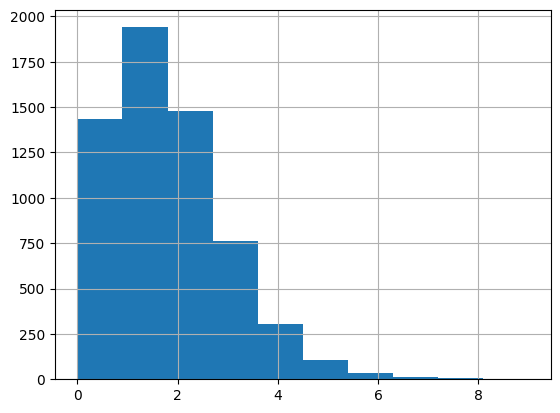

In [63]:
df['Score_home'].hist()

대부분의 경기에서 0~2의 득점을 기록하는 점을 감안하면 RMSE가 1에 근접하는 것은 좋지 않음.  
따라서 이것을 줄여 나가야 해요.